# This notebook uses PCA method to reduce the dimention, and uses various prediction models to predict business stars from data

In [ ]:
import os
import sys
import numpy as np
import json
import matplotlib.pylab as plt
import pandas as pd
import getpass
%matplotlib inline 
sys.path.append("..") # go to parent dir
import unicodecsv as csv
from sklearn.decomposition import PCA
import math
import seaborn as sns

Path Locations

In [9]:
username = getpass.getuser()
if username == 'sdekel':
    data_path = 'C:\DataSets\yelp_dataset\processed_data'
elif username == 'zahi':
    data_path = 'D:\\users\\zahi\\OneDrive - Bar-Ilan University\\yelp_dataset_challenge_round9\\yelp2'
else:
    data_path = ''  ## TODO: PUT YOUR DATA PATH HERE

Dataset Names

In [10]:
business_data_name = 'yelp_academic_dataset_business_with_Clustered_location_with_Binary_Categories_andAttributes_with_checkins_reviewsScore_clean_restaurants.csv'
business_fullpath = os.path.join( data_path, business_data_name )

Read DataFrame

In [11]:
business_data = pd.read_csv(business_fullpath, encoding='latin1')
#business_data.review_count.max()

In [12]:
stars=business_data["stars"]
business_data=business_data.drop(["business_id","postal_code","Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","stars"],axis=1)
business_data.head()

,hours_Friday,hours_Monday,hours_Saturday,hours_Sunday,hours_Thursday,hours_Tuesday,hours_Wednesday,is_open,review_count,Clustered_location_0,...,attribute_RestaurantsPriceRange2_3,attribute_RestaurantsPriceRange2_4,attribute_RestaurantsAttire_casual,attribute_RestaurantsAttire_dressy,attribute_RestaurantsAttire_formal,attribute_NoiseLevel_quiet,attribute_NoiseLevel_loud,attribute_NoiseLevel_average,attribute_NoiseLevel_very_loud,ScoresAvg
0,16.0,15.0,16.0,15.0,16.0,15.0,15.0,1,7,0,...,False,False,True,False,False,True,False,False,False,1.928571
1,12.0,12.0,12.0,12.0,12.0,12.0,12.0,1,9,0,...,False,False,True,False,False,True,False,False,False,2.333333
2,10.5,10.5,10.5,9.5,10.5,10.5,10.5,0,38,0,...,False,False,True,False,False,True,False,False,False,4.078947
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,0,...,False,False,True,False,False,False,False,False,False,0.428571
4,10.5,10.5,0.0,0.0,10.5,10.5,10.5,1,3,0,...,False,False,False,False,False,False,False,False,False,5.333333


Normalize Data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(business_data)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(business_data)

PCA

In [15]:
pca=PCA(n_components=150)
business_data_lowD=pca.fit_transform(scaled_data)

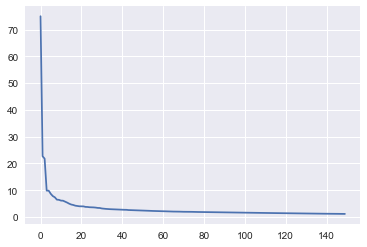

In [16]:
plt.plot(pca.explained_variance_[:150])

In [17]:
pd.DataFrame(business_data_lowD).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-2.141617,0.208881,0.632233,-0.154323,0.040022,-0.057821,-0.188244,2.412387,-2.566052,1.129751,...,-0.394883,-0.269813,-0.672298,-0.152301,-0.397384,-0.107114,-0.304626,0.259861,-0.445487,0.167421
1,-1.794454,-0.077108,0.186317,1.198828,-1.010996,-0.094830,-0.197041,1.758604,-1.737404,0.775927,...,-0.126044,1.451989,-0.651764,1.113430,0.381701,-0.040138,0.243174,-0.042771,-0.292422,0.492900
2,3.161187,-2.568135,-0.195136,1.629966,-1.360298,-0.172387,-0.322218,3.050343,-0.815516,0.370534,...,0.225542,2.336830,1.084248,-0.156516,-0.454542,1.722100,-1.607076,0.519586,0.734439,-0.237041
3,-2.769754,0.722165,0.835674,2.202623,-1.612728,-0.009254,0.156260,-2.441285,1.337949,-0.637999,...,0.203778,-0.754274,0.795693,0.139696,-0.009582,-0.145340,-0.668691,0.535145,0.769459,-0.194719
4,-2.791682,0.657934,0.623222,1.375193,-0.916490,0.067272,0.186682,-1.226684,0.412534,-0.041853,...,-0.236031,-0.657500,0.245501,-0.029218,-0.618626,-0.063870,0.398951,-0.381460,0.496694,0.002883


# Training

Decision Tree

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, stars, test_size=0.30, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=6, random_state=101)
dtree.fit(X_train,y_train)
predictions_dtree = dtree.predict(X_test)
#predictions=np.clip(predictions,a_max=5,a_min=1)
error_dtree=np.abs(np.array(y_test)-predictions_dtree)
print("Mean Absolute Error")
print(np.sum(error_dtree)/predictions_dtree.shape[0])

Mean Absolute Error
0.409466368962


Draw Tree

In [20]:
from sklearn import tree
tree.export_graphviz(dtree, out_file='tree.dot')

Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
dtree = RandomForestRegressor(n_estimators=50,max_depth=19, random_state=101)
dtree.fit(X_train,y_train)
predictions_random_forest = dtree.predict(X_test)
error_random_forest=np.abs(np.array(y_test)-predictions_random_forest)
score = np.sum(np.abs(error_random_forest))/predictions_random_forest.shape[0]
print( 'Number of trees %d and score= %f'% (50,score))

Number of trees 50 and score= 0.388919


Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=False)
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)
predictions_lr=np.clip(predictions,a_max=5,a_min=1)
error_lr=np.abs(np.array(y_test)-predictions_lr)
print(np.sum(error_lr)/predictions_lr.shape[0])

0.419471463972


Show Histogram of Results

(array([  8.12000000e+03,   4.01100000e+03,   1.31400000e+03,
          3.34000000e+02,   8.60000000e+01,   2.10000000e+01,
          1.20000000e+01,   1.80000000e+01,   7.00000000e+00,
          3.00000000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

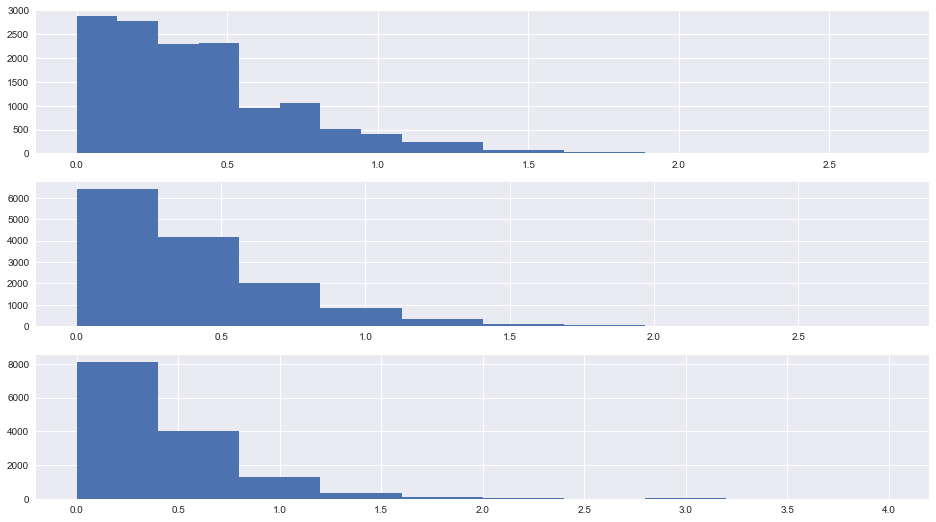

In [32]:
plt.figure(figsize=(16,9))
plt.subplot(3,1,1)
plt.hist(np.abs(predictions_dtree-np.array(y_test)),bins=20)
plt.subplot(3,1,2)
plt.hist(np.abs(predictions_random_forest-np.array(y_test)))
plt.subplot(3,1,3)
plt.hist(np.abs(predictions_lr-np.array(y_test)))

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
import time
callback=[keras.callbacks.ModelCheckpoint(filepath=time.strftime("%Y%m%d-%H%M%S") + '-{epoch:02d}-{val_mean_absolute_error:.4f}.hdf5' \
                                        , save_best_only=True)]
net=Sequential()
net.add(Dense(128,batch_input_shape=[None, 1070], activation='tanh',kernel_regularizer=l2(0.01)))
net.add(Dense(64,activation='tanh',kernel_regularizer=l2(0.01)))
net.add(Dense(1))
net.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
#net.fit(=np.array(business_data),y=np.array(stars), )
X_test_np=np.array(X_test)
X_train_np=np.array(X_train)
y_test_np=np.array(y_test)
y_train_np=np.array(y_train)
results=net.fit(batch_size=10,epochs=100,validation_data=(X_test_np,y_test_np),x=X_train_np,y=y_train_np, callbacks=callback)

Train on 32491 samples, validate on 13926 samples
Epoch 1/100
32491/32491 [==============================] - 17s - loss: 1.0796 - mean_absolute_error: 0.5514 - val_loss: 0.3662 - val_mean_absolute_error: 0.4439
Epoch 2/100
32491/32491 [==============================] - 14s - loss: 0.3610 - mean_absolute_error: 0.4390 - val_loss: 0.3755 - val_mean_absolute_error: 0.4453
Epoch 3/100
32491/32491 [==============================] - 14s - loss: 0.3436 - mean_absolute_error: 0.4281 - val_loss: 0.3218 - val_mean_absolute_error: 0.4148
Epoch 4/100
32491/32491 [==============================] - 14s - loss: 0.3346 - mean_absolute_error: 0.4234 - val_loss: 0.3426 - val_mean_absolute_error: 0.4285
Epoch 5/100
32491/32491 [==============================] - 14s - loss: 0.3300 - mean_absolute_error: 0.4206 - val_loss: 0.3532 - val_mean_absolute_error: 0.4360
Epoch 6/100
32491/32491 [==============================] - 14s - loss: 0.3274 - mean_absolute_error: 0.4199 - val_loss: 0.3553 - val_mean_absolut

KeyboardInterrupt: 

In [26]:
nn=keras.models.load_model(filepath="20170928-122245-54-0.4008.hdf5")
predictions_nn=nn.predict(x=X_test)
error_nn=np.abs(np.array(y_test)-predictions_nn.transpose())
#predictions_nn=np.clip(predictions_nn,a_max=5,a_min=1)
print(np.sum(error_nn)/error_nn.shape[1])

0.400775574617


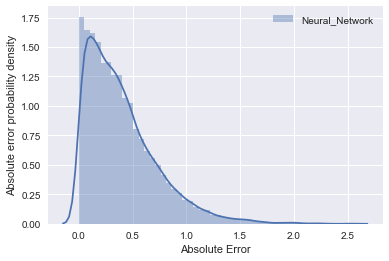

In [27]:
sns.distplot(error_nn, label='Neural_Network')

plt.legend()
plt.xlabel("Absolute Error")
plt.ylabel("Absolute error probability density")
plt.savefig("error_nn_dist.jpg")

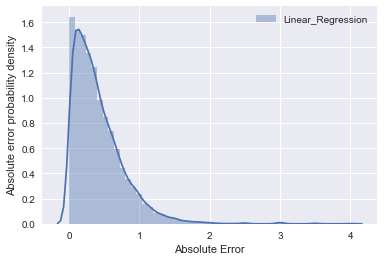

In [28]:
#sns.distplot(error_nn, label='Neural_Network')
sns.distplot(error_lr, label="Linear_Regression")
#sns.distplot(error_dtree, label="Decision Tree")
#sns.distplot(error_random_forest, label= "Random Forest")
plt.legend()
plt.xlabel("Absolute Error")
plt.ylabel("Absolute error probability density")
plt.savefig("error_lr_dist.jpg")

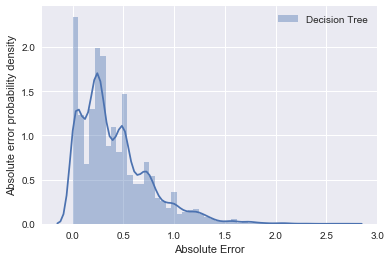

In [29]:
#sns.distplot(error_nn, label='Neural_Network')
#sns.distplot(error_lr, label="Linear_Regression")
sns.distplot(error_dtree, label="Decision Tree")
#sns.distplot(error_random_forest, label= "Random Forest")
plt.legend()
plt.xlabel("Absolute Error")
plt.ylabel("Absolute error probability density")
plt.savefig("error_dtree_dist.jpg")


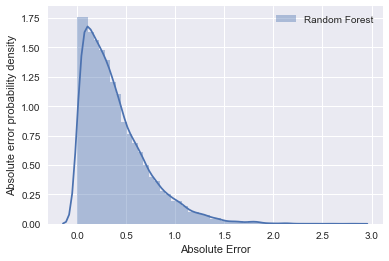

In [30]:
#sns.distplot(error_nn, label='Neural_Network')
#sns.distplot(error_lr, label="Linear_Regression")
#sns.distplot(error_dtree, label="Decision Tree")
sns.distplot(error_random_forest, label= "Random Forest")
plt.legend()
plt.xlabel("Absolute Error")
plt.ylabel("Absolute error probability density")
plt.savefig("error_random_forest_dist.jpg")